In [1]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_scores = model.predict_proba(X_test)[:,1]

In [18]:
model.predict_proba(X_test) # it gives two columns . First column is the probabilities of sample going to 0 class and second column is probabilities of the sample going to 1 class. We are interested in positive class 1.

array([[0.95046386, 0.04953614],
       [0.82542402, 0.17457598],
       [0.90638119, 0.09361881],
       [0.74493115, 0.25506885],
       [0.36452456, 0.63547544],
       [0.88328632, 0.11671368],
       [0.93432977, 0.06567023],
       [0.57811601, 0.42188399],
       [0.95133828, 0.04866172],
       [0.42436669, 0.57563331],
       [0.66124245, 0.33875755],
       [0.58695234, 0.41304766],
       [0.30145884, 0.69854116],
       [0.80035851, 0.19964149],
       [0.97998249, 0.02001751],
       [0.17528934, 0.82471066],
       [0.13343075, 0.86656925],
       [0.96898996, 0.03101004],
       [0.74489296, 0.25510704],
       [0.10507497, 0.89492503],
       [0.04753583, 0.95246417],
       [0.16521184, 0.83478816],
       [0.88259362, 0.11740638],
       [0.55330097, 0.44669903],
       [0.91076723, 0.08923277],
       [0.9311727 , 0.0688273 ],
       [0.34882432, 0.65117568],
       [0.58802125, 0.41197875],
       [0.82139623, 0.17860377],
       [0.71309845, 0.28690155],
       [0.

In [19]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [11]:
fpr

array([0.        , 0.        , 0.        , 0.00917431, 0.00917431,
       0.02752294, 0.02752294, 0.0733945 , 0.0733945 , 0.08256881,
       0.08256881, 0.09174312, 0.09174312, 0.10091743, 0.10091743,
       0.11009174, 0.11009174, 0.12844037, 0.12844037, 0.14678899,
       0.14678899, 0.1559633 , 0.1559633 , 0.17431193, 0.17431193,
       0.18348624, 0.18348624, 0.22018349, 0.22018349, 0.30275229,
       0.30275229, 0.35779817, 0.35779817, 0.39449541, 0.39449541,
       0.40366972, 0.40366972, 0.42201835, 0.42201835, 0.53211009,
       0.53211009, 0.5412844 , 0.5412844 , 0.57798165, 0.57798165,
       0.63302752, 0.63302752, 0.66055046, 0.66055046, 0.74311927,
       0.74311927, 0.98165138, 0.98165138, 1.        ])

In [12]:
thresholds

array([       inf, 0.99355928, 0.9526512 , 0.95246417, 0.82471066,
       0.76883113, 0.76198112, 0.68385812, 0.67529148, 0.67422748,
       0.65117568, 0.65085312, 0.63547544, 0.58630057, 0.57563331,
       0.56974552, 0.52514581, 0.47017119, 0.46131937, 0.45043617,
       0.43904474, 0.43865745, 0.42233336, 0.41990462, 0.41304766,
       0.41197875, 0.40477801, 0.37970704, 0.36866729, 0.31020305,
       0.30880354, 0.27772349, 0.27205111, 0.25510704, 0.25506885,
       0.24740821, 0.24546297, 0.23665336, 0.22887288, 0.18185164,
       0.17860377, 0.17457598, 0.1732547 , 0.14638332, 0.14074927,
       0.11671368, 0.11494479, 0.11000892, 0.10665836, 0.08923277,
       0.08671687, 0.02001751, 0.01931547, 0.00160784])

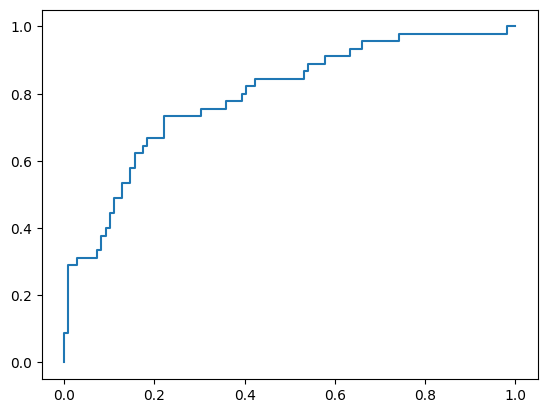

In [17]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)

In [20]:
auc = roc_auc_score(y_test, y_scores)
print("AUC:", auc)

AUC: 0.7934760448521917


In [13]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [14]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.36866729149373506


In [15]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import roc_auc_score

# Assuming fpr, tpr, thresholds are already calculated as before
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores)

# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC curve (Area = {roc_auc:.2f})'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [16]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming that X_train, X_test, y_train, y_test are already defined

# SVM requires feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_scores = lr_model.predict_proba(X_test)[:,1]

# SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_scores = svm_model.predict_proba(X_test_scaled)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)

# Generate ROC curve data for SVM model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_scores)
svm_auc = roc_auc_score(y_test, svm_scores)

# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()
